___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will learn what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** package. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with the Random Forest, Gradient Descent Boosting , KNN algorithms.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind K-Means, Gradient Boosting , KNN, Random Forest, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Label Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Gradient Boosting Classifier***, ***K Neighbors Classifier***, ***Random Forest Classifier***. You can use the related modules of the ***scikit-learn*** library. You can use scikit-learn ***Confusion Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Gradient Boosting Classifier, Evaluate Model Performance and Predict Test Data
- Built K Neighbors Classifier and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"
import scipy.stats as stats
%matplotlib inline
import datetime as dt
from datetime import datetime

# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve 
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, PowerTransformer, LabelEncoder 
from sklearn.svm import SVR, SVC
from sklearn.tree import plot_tree, DecisionTreeClassifier
from yellowbrick.classifier import ClassificationReport

from xgboost import XGBRegressor, XGBClassifier, plot_importance

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [2]:
df= pd.read_csv('HR_Dataset.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.380,0.530,2,157,3,0,1,0,sales,low
1,0.800,0.860,5,262,6,0,1,0,sales,medium
2,0.110,0.880,7,272,4,0,1,0,sales,medium
3,0.720,0.870,5,223,5,0,1,0,sales,low
4,0.370,0.520,2,159,3,0,1,0,sales,low


### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Here, you can find the average of both the groups using groupby() and mean() function.

In [3]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.describe()   # Summary of numerical variables

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000
mean,0.613,0.716,3.803,201.050,3.498,0.145,0.238,0.021
std,0.249,0.171,1.233,49.943,1.460,0.352,0.426,0.144
min,0.090,0.360,2.000,96.000,2.000,0.000,0.000,0.000
25%,0.440,0.560,3.000,156.000,3.000,0.000,0.000,0.000
50%,0.640,0.720,4.000,200.000,3.000,0.000,0.000,0.000
75%,0.820,0.870,5.000,245.000,4.000,0.000,0.000,0.000
max,1.000,1.000,7.000,310.000,10.000,1.000,1.000,1.000


In [5]:
df.describe(include=['O']).T  # Summary of categorical variables

,count,unique,top,freq
Departments,14999,10,sales,4140
salary,14999,3,low,7316


In [6]:
df.duplicated().sum()  # Check for duplicate rows

3008

In [7]:
df.drop_duplicates(keep='first', inplace=True)

In [8]:
df.duplicated().sum()  # Check for duplicate rows

0

In [9]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [10]:
df.columns=[i.title() for i in df.columns]
df.columns

Index(['Satisfaction_Level', 'Last_Evaluation', 'Number_Project',
       'Average_Montly_Hours', 'Time_Spend_Company', 'Work_Accident', 'Left',
       'Promotion_Last_5Years', 'Departments ', 'Salary'],
      dtype='object')

In [11]:
df.rename(columns={"Departments " : "Departments"}, inplace=True)

In [12]:
last_column = df.pop('Left')                        # I want to move named "left" column to the end of the dataframe because it is the target variable
df.insert(9, 'Left', last_column)
df.head(2)

,Satisfaction_Level,Last_Evaluation,Number_Project,Average_Montly_Hours,Time_Spend_Company,Work_Accident,Promotion_Last_5Years,Departments,Salary,Left
0,0.380,0.530,2,157,3,0,0,sales,low,1
1,0.800,0.860,5,262,6,0,0,sales,medium,1


In [13]:
df.shape      # Finally we have 11991 rows and 10 columns

(11991, 10)

In [14]:
df.Left.value_counts()  # Check for target variable

0    10000
1     1991
Name: Left, dtype: int64

In [15]:
fig = px.pie(df, values = df['Left'].value_counts(), 
             names = (df['Left'].value_counts()).index, 
             title = '"Left" Column Distribution',width=800,
                   height=600,)
fig.show()

In [16]:
print(f'Percentage of left  : % {round(df.Left.value_counts(normalize=True)[1]*100,2)}\
      --> ({df.Left.value_counts()[1]} observations for left)\
      \nPercentage of stayed: % {round(df.Left.value_counts(normalize=True)[0]*100,2)}\
      --> ({df.Left.value_counts()[0]} observations for stayed)')

Percentage of left  : % 16.6      --> (1991 observations for left)      
Percentage of stayed: % 83.4      --> (10000 observations for stayed)


In [17]:
df.groupby('Left').mean()

,Satisfaction_Level,Last_Evaluation,Number_Project,Average_Montly_Hours,Time_Spend_Company,Work_Accident,Promotion_Last_5Years
Left,,,,,,,
0,0.667,0.716,3.787,198.943,3.262,0.174,0.019
1,0.440,0.722,3.883,208.162,3.881,0.053,0.004


In [18]:
df[df.Left ==1].describe().T.style.background_gradient(cmap='summer_r')

,count,mean,std,min,25%,50%,75%,max
Satisfaction_Level,1991.000000,0.440271,0.265207,0.090000,0.110000,0.410000,0.730000,0.920000
Last_Evaluation,1991.000000,0.721783,0.197436,0.450000,0.520000,0.790000,0.910000,1.000000
Number_Project,1991.000000,3.883476,1.817139,2.000000,2.000000,4.000000,6.000000,7.000000
Average_Montly_Hours,1991.000000,208.162230,61.295145,126.000000,146.000000,226.000000,262.500000,310.000000
Time_Spend_Company,1991.000000,3.881467,0.974041,2.000000,3.000000,4.000000,5.000000,6.000000
Work_Accident,1991.000000,0.052737,0.223565,0.000000,0.000000,0.000000,0.000000,1.000000
Promotion_Last_5Years,1991.000000,0.004018,0.063277,0.000000,0.000000,0.000000,0.000000,1.000000
Left,1991.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df[df.Left ==0].describe().T.style.background_gradient(cmap='viridis')

,count,mean,std,min,25%,50%,75%,max
Satisfaction_Level,10000.000000,0.667365,0.217082,0.120000,0.540000,0.690000,0.840000,1.000000
Last_Evaluation,10000.000000,0.715667,0.161919,0.360000,0.580000,0.710000,0.850000,1.000000
Number_Project,10000.000000,3.786800,0.981755,2.000000,3.000000,4.000000,4.000000,6.000000
Average_Montly_Hours,10000.000000,198.942700,45.665507,96.000000,162.000000,198.000000,238.000000,287.000000
Time_Spend_Company,10000.000000,3.262000,1.367239,2.000000,2.000000,3.000000,4.000000,10.000000
Work_Accident,10000.000000,0.174500,0.379558,0.000000,0.000000,0.000000,0.000000,1.000000
Promotion_Last_5Years,10000.000000,0.019500,0.138281,0.000000,0.000000,0.000000,0.000000,1.000000
Left,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [20]:
df_new = pd.crosstab([df.Departments, df.Left], df.Salary)
df_new

Salary            high   low  medium
Departments Left                    
IT          0       67   389     362
            1        4    87      67
RandD       0       44   271     294
            1        3    51      31
accounting  0       60   237     215
            1        3    59      47
hr          0       35   234     219
            1        3    62      48
management  0      127   107     150
            1        1    32      19
marketing   0       59   234     268
            1        3    76      33
product_mng 0       48   284     244
            1        4    59      47
sales       0      225  1234    1230
            1       12   319     219
support     0      121   676     712
            1        5   191     116
technical   0      156   900     798
            1       10   238     142

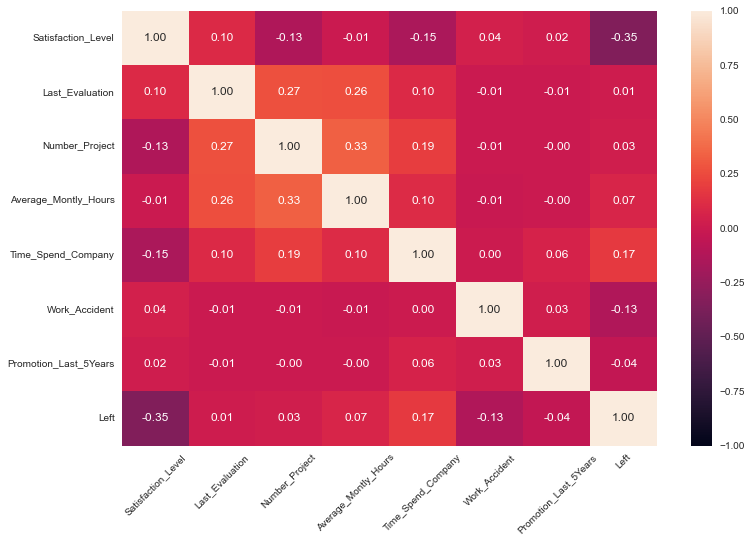

In [21]:
plt.figure(figsize = (12, 8))
sns.heatmap (df.corr(), annot = True, fmt = '.2f', vmin = -1, vmax = 1)
plt.xticks(rotation = 45);

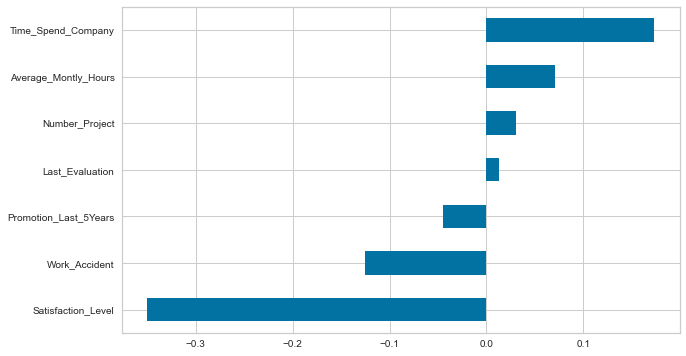

In [22]:
df.corr()['Left'].sort_values().drop('Left').plot(kind = 'barh');

***Based on the examinations made above,***

- There is no multicollinearity problem among the features.
- We have weak level correlation between the numerical features and the target column.
- Also there is weak level correlation between the columns.

## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

In [23]:
df.Left.value_counts()

0    10000
1     1991
Name: Left, dtype: int64

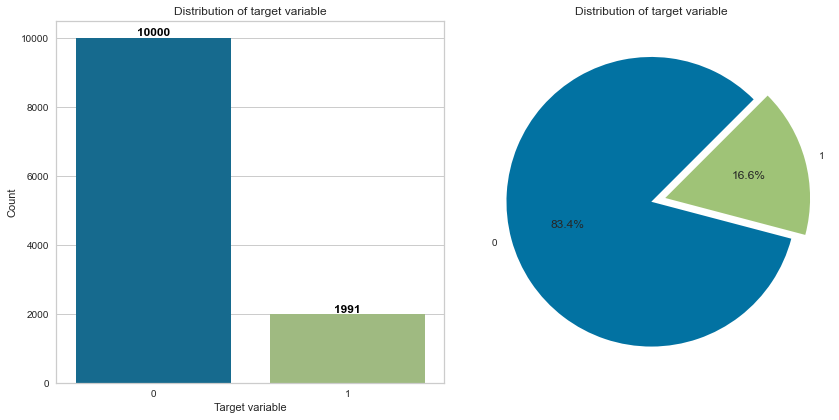

In [24]:
# with seaborn
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
ax = sns.countplot(x='Left', data=df)
plt.title('Distribution of target variable')
plt.xlabel('Target variable')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
plt.subplot(1,2,2)
plt.pie(df.Left.value_counts(), labels = df.Left.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode = (0, 0.1))
plt.title('Distribution of target variable')
plt.tight_layout()
plt.show()

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

In [25]:
df.Number_Project.value_counts()

4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: Number_Project, dtype: int64

In [26]:
# with plotly
fig = px.bar(df['Number_Project'].value_counts(),
             labels={"index": "Number_Project", "value":"Number of employee"},
             title = '"Number_Project" Column Distribution',
             width=600,
             height=400)
fig.show()

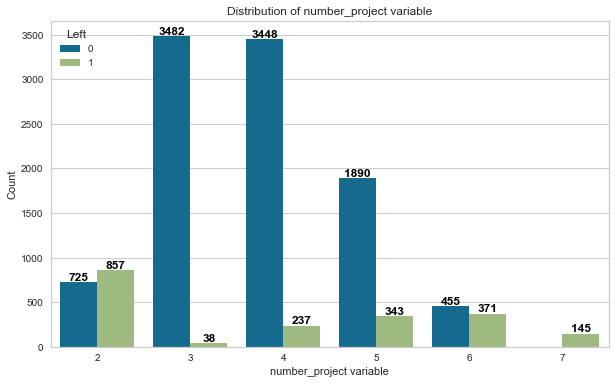

In [27]:
# with seaborn
ax = sns.countplot(x='Number_Project', data=df, hue= "Left")
plt.title('Distribution of number_project variable')
plt.xlabel('number_project variable')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
ax.bar_label(ax.containers[1], fontsize=12, color='black', fontweight='bold')
plt.show()

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


In [28]:
df.Time_Spend_Company.value_counts()

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: Time_Spend_Company, dtype: int64

In [29]:
# with plotly
fig = px.bar(df['Time_Spend_Company'].value_counts(),
                labels={"index": "Time_Spend_Company", "value":"Number of employee"},
                title = '"Time_Spend_Company" Column Distribution',
                width=600,
                height=400)
fig.show()

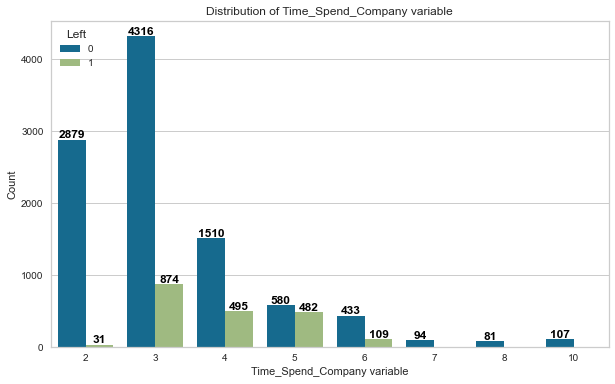

In [30]:
# with seaborn
ax = sns.countplot(x='Time_Spend_Company', data=df, hue="Left")
plt.title('Distribution of Time_Spend_Company variable')
plt.xlabel('Time_Spend_Company variable')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
ax.bar_label(ax.containers[1], fontsize=12, color='black', fontweight='bold')
plt.show()

### Subplots of Features

You can use the methods of the matplotlib.

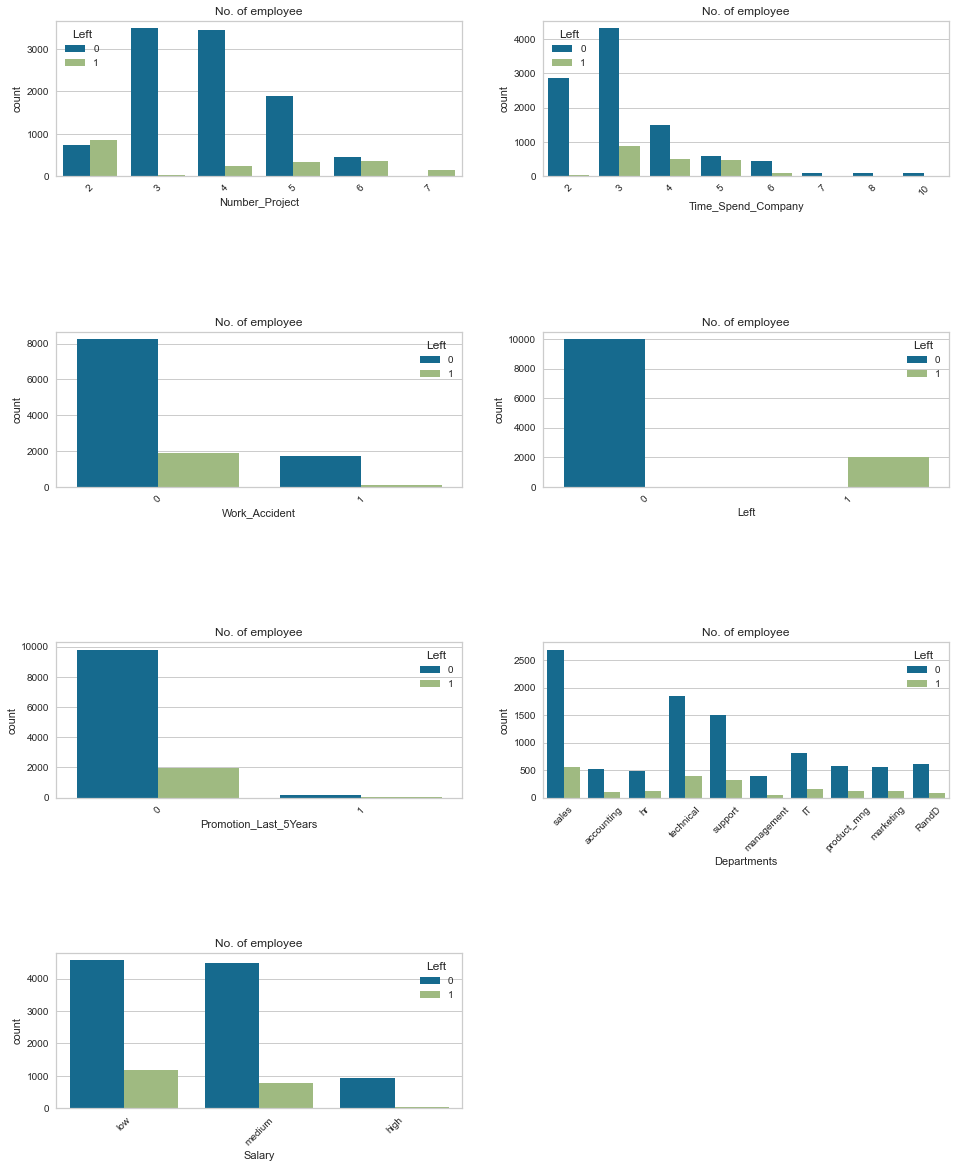

In [31]:
features=['Number_Project','Time_Spend_Company','Work_Accident','Left', 'Promotion_Last_5Years','Departments','Salary']
fig=plt.subplots(figsize=(16,20))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df,hue='Left')
    plt.xticks(rotation=45)
    plt.title("No. of employee")

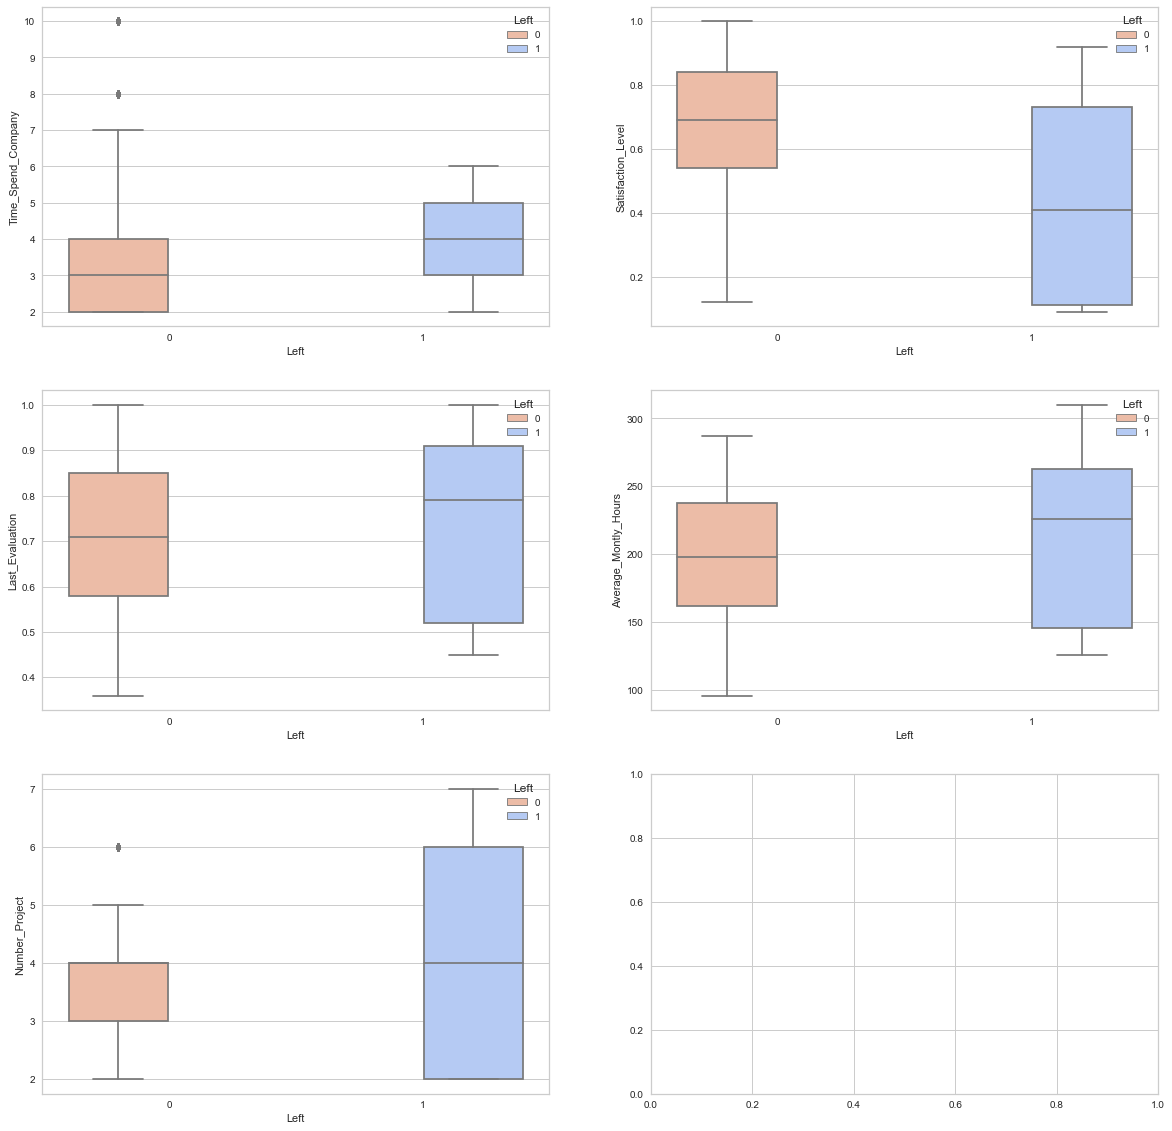

In [32]:
features=['Number_Project','Time_Spend_Company','Work_Accident','Left', 'Promotion_Last_5Years','Departments','Salary']
fig, axarr = plt.subplots(3,2 , figsize=(20, 20))
ax= sns.boxplot(y='Time_Spend_Company',x = 'Left', hue = 'Left',data = df, ax=axarr[0][0],palette="coolwarm_r")
sns.boxplot(y='Satisfaction_Level',x = 'Left', hue = 'Left',data = df , ax=axarr[0][1],palette="coolwarm_r")
sns.boxplot(y='Last_Evaluation',x = 'Left', hue = 'Left',data = df, ax=axarr[1][0],palette="coolwarm_r")
sns.boxplot(y='Average_Montly_Hours',x = 'Left', hue = 'Left',data = df, ax=axarr[1][1],palette="coolwarm_r")
sns.boxplot(y='Number_Project',x = 'Left', hue = 'Left',data = df, ax=axarr[2][0],palette="coolwarm_r")
plt.show()

## 3. Data Pre-Processing

#### Label Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.



In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OrdinalEncoder, OneHotEncoder

In [34]:
df_enc = df.copy()

In [ ]:
df_enc.columns

In [35]:
enc1 = OrdinalEncoder()
df_enc['Departments'] = enc1.fit_transform(df_enc[['Departments']])

enc2 = OrdinalEncoder(categories=[['low', 'medium', 'high']])
df_enc['Salary'] = enc2.fit_transform(df_enc[['Salary']])

In [36]:
df_enc.head()

,Satisfaction_Level,Last_Evaluation,Number_Project,Average_Montly_Hours,Time_Spend_Company,Work_Accident,Promotion_Last_5Years,Departments,Salary,Left
0,0.380,0.530,2,157,3,0,0,7.000,0.000,1
1,0.800,0.860,5,262,6,0,0,7.000,1.000,1
2,0.110,0.880,7,272,4,0,0,7.000,1.000,1
3,0.720,0.870,5,223,5,0,0,7.000,0.000,1
4,0.370,0.520,2,159,3,0,0,7.000,0.000,1


#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

In [37]:
scaler = MinMaxScaler()

In [38]:
df_scaled = scaler.fit_transform(df_enc)

In [39]:
df_scaled = pd.DataFrame(df_scaled, columns=df_enc.columns)

In [40]:
df_scaled.head()

,Satisfaction_Level,Last_Evaluation,Number_Project,Average_Montly_Hours,Time_Spend_Company,Work_Accident,Promotion_Last_5Years,Departments,Salary,Left
0,0.319,0.266,0.000,0.285,0.125,0.000,0.000,0.778,0.000,1.000
1,0.780,0.781,0.600,0.776,0.500,0.000,0.000,0.778,0.500,1.000
2,0.022,0.812,1.000,0.822,0.250,0.000,0.000,0.778,0.500,1.000
3,0.692,0.797,0.600,0.593,0.375,0.000,0.000,0.778,0.000,1.000
4,0.308,0.250,0.000,0.294,0.125,0.000,0.000,0.778,0.000,1.000


## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [42]:
X = df_scaled[['Satisfaction_Level', 'Last_Evaluation']]

In [43]:
X.head()

,Satisfaction_Level,Last_Evaluation
0,0.319,0.266
1,0.780,0.781
2,0.022,0.812
3,0.692,0.797
4,0.308,0.250


In [44]:
# Hopkins Test

from pyclustertend import hopkins
hopkins(X, X.shape[0])

0.14875104586241822

Text(0.5, 1.0, 'elbow method')

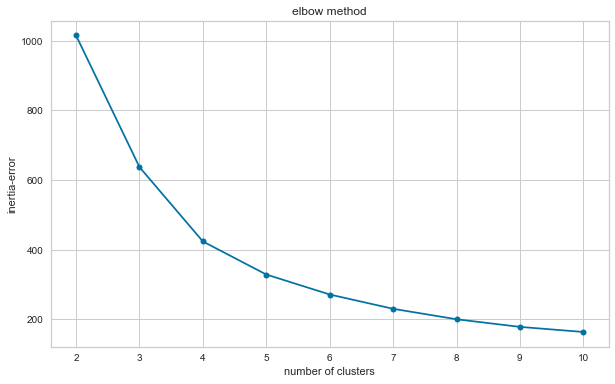

In [45]:
from sklearn.cluster import KMeans

ssd = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)
    
plt.plot(range(2, 11), ssd, "bo-", markersize=6)
plt.xlabel("number of clusters")
plt.ylabel("inertia-error") 
plt.title("elbow method")

<AxesSubplot:>

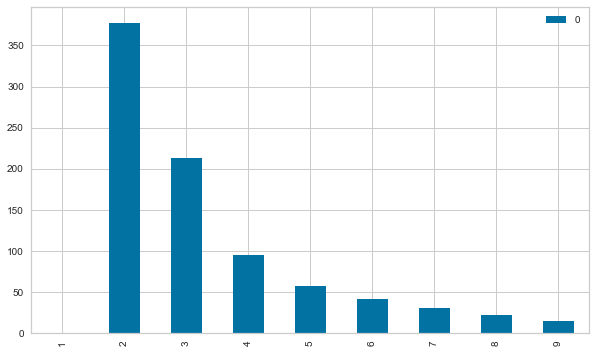

In [46]:
pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1).plot(kind='bar')

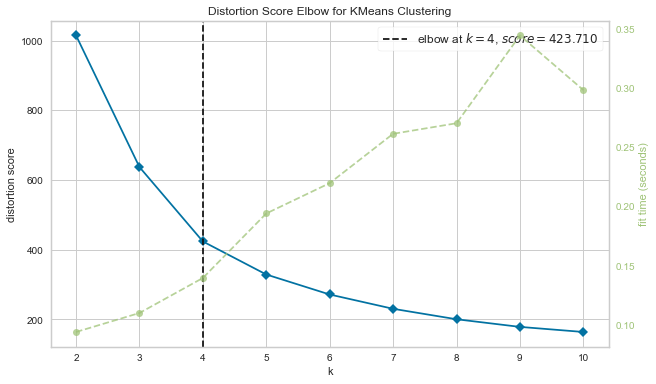

In [47]:
# yellowbrick

from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2,11))

visualizer.fit(X)        
visualizer.show();

In [48]:
from sklearn.metrics import silhouette_score

for num_clusters in range(2,11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3768649114801321
For n_clusters=3, the silhouette score is 0.4182074498146387
For n_clusters=4, the silhouette score is 0.42497572199330713
For n_clusters=5, the silhouette score is 0.41628686320354974
For n_clusters=6, the silhouette score is 0.4042740773310997
For n_clusters=7, the silhouette score is 0.39462030398095993
For n_clusters=8, the silhouette score is 0.3792564379557734
For n_clusters=9, the silhouette score is 0.3825365397087687
For n_clusters=10, the silhouette score is 0.3821776080391847


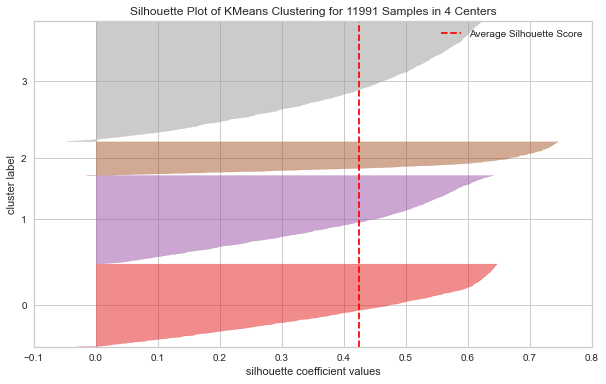

In [49]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)
visualizer.poof();

In [50]:
km_model = KMeans(n_clusters=4, random_state=42)
km_model.fit(X)

KMeans(n_clusters=4, random_state=42)

In [51]:
X['predicted_clusters'] = km_model.labels_

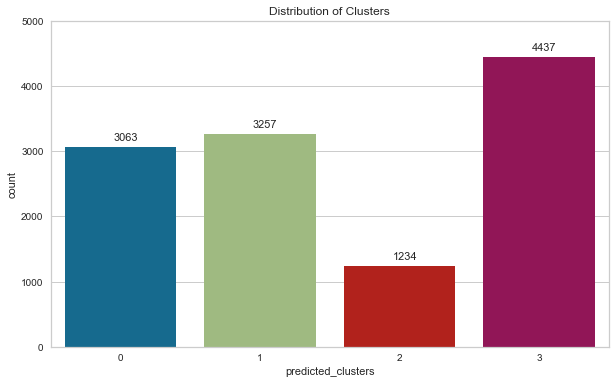

In [52]:
ax = sns.countplot(x='predicted_clusters', data=X)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+100), fontsize=11)
    
ax.set_title('Distribution of Clusters')    
ax.set_ylim(0, 5000);

In [53]:
X.sample(10)

,Satisfaction_Level,Last_Evaluation,predicted_clusters
1808,0.374,0.219,0
6472,0.747,0.594,1
4093,0.066,0.391,0
11209,0.945,0.750,3
3417,0.813,0.750,3
6697,0.846,0.781,3
5791,0.989,0.844,3
9500,0.747,0.859,3
5608,0.791,0.375,1
10290,0.736,0.969,3


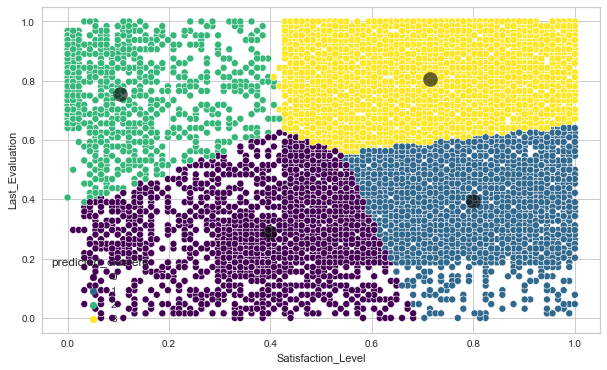

In [57]:
centers = km_model.cluster_centers_
sns.scatterplot(data=X, x='Satisfaction_Level', 
                y='Last_Evaluation', hue=X.predicted_clusters, palette='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.6)

<AxesSubplot:xlabel='Satisfaction_Level', ylabel='Last_Evaluation'>

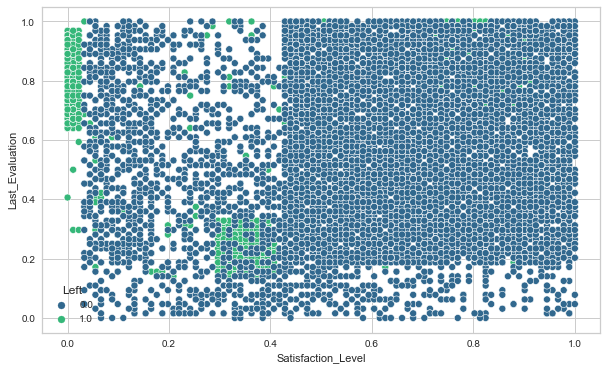

In [59]:
sns.scatterplot(data=df_scaled, x='Satisfaction_Level', 
                y='Last_Evaluation', hue='Left', palette='viridis')

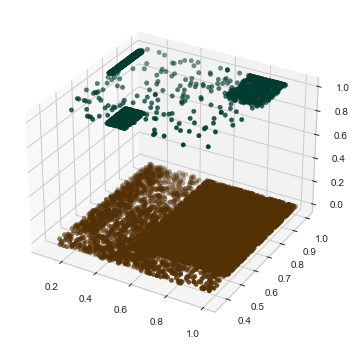

In [60]:
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.colors import ListedColormap
fig = plt.figure()
# cmap = ListedColormap(sns.color_palette("husl").as_hex())
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Satisfaction_Level'], df['Last_Evaluation'], df['Left'],
           c=df['Left'], cmap='BrBG')

**Evaluate**

In [61]:
print(f'Inertia Score (n=4)    : {km_model.inertia_}')
print(f'Silhouette Score (n=4) : {silhouette_score(X, km_model.labels_)}')

Inertia Score (n=4)    : 423.71215384879827
Silhouette Score (n=4) : 0.7938071654455745


In [62]:
X.groupby('predicted_clusters').describe()

Satisfaction_Level                                      \
                                count  mean   std   min   25%   50%   75%   
predicted_clusters                                                          
0                            3063.000 0.397 0.133 0.011 0.319 0.396 0.495   
1                            3257.000 0.799 0.120 0.549 0.692 0.802 0.901   
2                            1234.000 0.103 0.108 0.000 0.011 0.066 0.154   
3                            4437.000 0.714 0.157 0.407 0.582 0.714 0.835   

                         Last_Evaluation                                      \
                     max           count  mean   std   min   25%   50%   75%   
predicted_clusters                                                             
0                  0.681        3063.000 0.290 0.134 0.000 0.203 0.281 0.375   
1                  1.000        3257.000 0.394 0.133 0.000 0.297 0.406 0.500   
2                  0.418        1234.000 0.757 0.139 0.391 0.656 0.766 0.875   
3                  1.000        4437.000 0.806 0.119 0.562 0.703 0.812 0.906   

                          
                     max  
predicted_clusters        
0                  0.625  
1                  0.641  
2                  1.000  
3                  1.000

In [63]:
X['label'] = df['Left']

In [64]:
pd.crosstab(X['label'], X['predicted_clusters'])

predicted_clusters,0,1,2,3
label,,,,
0.000,2171,3233,698,3889
1.000,889,24,532,546


## 5. Model Building

In [37]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,OrdinalEncoder,OneHotEncoder

from sklearn.model_selection import train_test_split,cross_val_score,cross_validate,GridSearchCV

from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score
from sklearn.metrics import average_precision_score,precision_recall_curve,plot_precision_recall_curve

from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassPredictionError

In [49]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Split Data as Train and Test Set

Here, Dataset is broken into two parts in ratio of 70:30. It means 70% data will used for model training and 30% for model testing.

In [50]:
X = df.drop(['Left'], axis = 1)
y = df['Left']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  stratify=y, random_state = 42)

In [52]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (8393, 9)
Train target shape   :  (8393,)
Test features shape  :  (3598, 9)
Test target shape    :  (3598,)


### #Gradient Boosting Classifier

#### Model Building

In [53]:
# categorical features = ["Departments", "Salary"]
preprocessor = ColumnTransformer(transformers=[
    ('encoder_nominal', OrdinalEncoder(), ['Departments']),
    ('encoder_ordinal', OrdinalEncoder(categories=[['low', 'medium', 'high']]), ['Salary'])
], remainder='passthrough')
# pipeline 
gbc_model = Pipeline(steps=[("preprocessor", preprocessor),("clf", GradientBoostingClassifier(random_state=42))]) # clf for classifier

gbc_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder_nominal',
                                                  OrdinalEncoder(),
                                                  ['Departments']),
                                                 ('encoder_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['Salary'])])),
                ('clf', GradientBoostingClassifier(random_state=42))])

In [54]:
eval_metric(gbc_model, X_train, y_train, X_test, y_test)

Test_Set
[[2974   27]
 [  43  554]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3001
           1       0.95      0.93      0.94       597

    accuracy                           0.98      3598
   macro avg       0.97      0.96      0.96      3598
weighted avg       0.98      0.98      0.98      3598


Train_Set
[[6960   39]
 [  99 1295]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6999
           1       0.97      0.93      0.95      1394

    accuracy                           0.98      8393
   macro avg       0.98      0.96      0.97      8393
weighted avg       0.98      0.98      0.98      8393



In [55]:
# Cross Validation
model = Pipeline(steps=[("preprocessor", preprocessor),("clf", GradientBoostingClassifier(random_state=42))])
scores = cross_validate(model, X_train, y_train, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=10)

df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores.mean()[2:]

test_accuracy    0.981
test_precision   0.962
test_recall      0.925
test_f1          0.943
test_roc_auc     0.987
dtype: float64

In [56]:
# Grid Search
model = Pipeline(steps=[("preprocessor", preprocessor),("clf", GradientBoostingClassifier(random_state=42))])

param_grid = {'clf__n_estimators':[100, 128, 200], 'clf__max_depth': [3, 4, 5, 6], 'clf__subsample':[0.5, 1], 
              'clf__max_features' : [None, 3, 4, 5], 'clf__learning_rate': [0.05, 0.08, 0.1]} 

gbc_grid_model = GridSearchCV(model, param_grid, scoring='f1', cv=5, verbose=1, n_jobs=-1).fit(X_train, y_train)

print('\n', gbc_grid_model.best_params_)
print('\n', gbc_grid_model.best_estimator_)
print('\n', 'Best Score :', gbc_grid_model.best_score_)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits

 {'clf__learning_rate': 0.05, 'clf__max_depth': 6, 'clf__max_features': 5, 'clf__n_estimators': 200, 'clf__subsample': 1}

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder_nominal',
                                                  OrdinalEncoder(),
                                                  ['Departments']),
                                                 ('encoder_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['Salary'])])),
                ('clf',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=6,
               

In [57]:
eval_metric(gbc_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[2984   17]
 [  41  556]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3001
           1       0.97      0.93      0.95       597

    accuracy                           0.98      3598
   macro avg       0.98      0.96      0.97      3598
weighted avg       0.98      0.98      0.98      3598


Train_Set
[[6989   10]
 [  53 1341]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6999
           1       0.99      0.96      0.98      1394

    accuracy                           0.99      8393
   macro avg       0.99      0.98      0.99      8393
weighted avg       0.99      0.99      0.99      8393



In [59]:
gbc_model = Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder_nominal',
                                                  OrdinalEncoder(),
                                                  ['Departments']),
                                                 ('encoder_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['Salary'])])),
                ('clf',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=6,
                                            max_features=5, n_estimators=200,
                                            random_state=42, subsample=1))]).fit(X_train, y_train)

#### Evaluating Model Performance

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

In [60]:
print("GB_Model")
print ("------------------")
eval_metric(gbc_model, X_train, y_train, X_test, y_test)

GB_Model
------------------
Test_Set
[[2984   17]
 [  41  556]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3001
           1       0.97      0.93      0.95       597

    accuracy                           0.98      3598
   macro avg       0.98      0.96      0.97      3598
weighted avg       0.98      0.98      0.98      3598


Train_Set
[[6989   10]
 [  53 1341]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6999
           1       0.99      0.96      0.98      1394

    accuracy                           0.99      8393
   macro avg       0.99      0.98      0.99      8393
weighted avg       0.99      0.99      0.99      8393



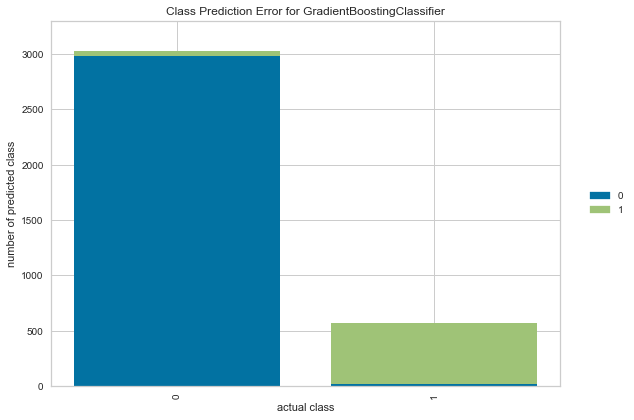

In [61]:
visualizer = ClassPredictionError(gbc_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.poof();

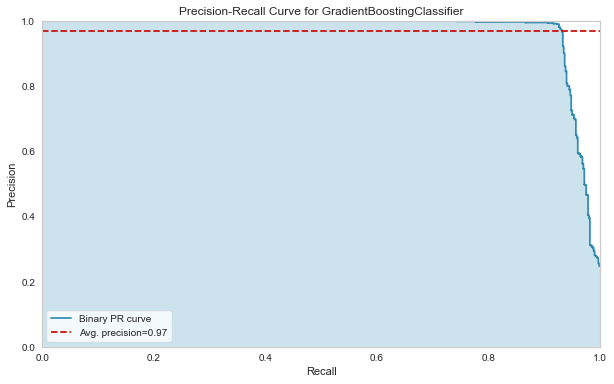

In [62]:
viz = PrecisionRecallCurve(gbc_model)

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [63]:
y_pred_proba = gbc_model.predict_proba(X_test)
average_precision_score(y_test, y_pred_proba[:,1])

0.9692565186323895

**Feature Importance**

In [64]:
gbc_model.named_steps

{'preprocessor': ColumnTransformer(remainder='passthrough',
                   transformers=[('encoder_nominal', OrdinalEncoder(),
                                  ['Departments']),
                                 ('encoder_ordinal',
                                  OrdinalEncoder(categories=[['low', 'medium',
                                                              'high']]),
                                  ['Salary'])]),
 'clf': GradientBoostingClassifier(learning_rate=0.05, max_depth=6, max_features=5,
                            n_estimators=200, random_state=42, subsample=1)}

In [65]:
pd.DataFrame(gbc_model.named_steps['clf'].feature_importances_, index=X_train.columns, columns=['Importance']). \
             sort_values('Importance', ascending=False)

,Importance
Number_Project,0.372
Time_Spend_Company,0.195
Promotion_Last_5Years,0.153
Work_Accident,0.143
Average_Montly_Hours,0.129
Satisfaction_Level,0.004
Last_Evaluation,0.003
Departments,0.001
Salary,0.000


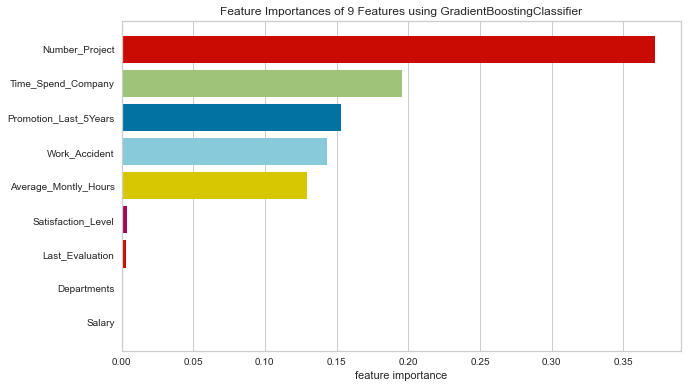

<AxesSubplot:title={'center':'Feature Importances of 9 Features using GradientBoostingClassifier'}, xlabel='feature importance'>

In [66]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(gbc_model.named_steps['clf'], relative=False)
visualizer = RadViz(size=(700, 400))
viz.fit(X_train, y_train)
viz.show()

**Scores**

In [67]:
y_pred = gbc_model.predict(X_test)
y_pred_proba = gbc_model.predict_proba(X_test)

gbc_accuracy = gbc_model.score(X_test, y_test) # accuracy_score(y_test, y_pred)
gbc_precision = precision_score(y_test, y_pred)
gbc_recall = recall_score(y_test, y_pred)
gbc_f1 = f1_score(y_test, y_pred)
gbc_precision_recall = average_precision_score(y_test, y_pred_proba[:,1])

#### Prediction

**PREDICTION WITH PIPELINE**

In [71]:
x = pd.DataFrame({
        'Satisfaction_Level': 0.5,
        'Last_Evaluation': 0.7,
        'Number_Project': 7,
        'Average_Montly_Hours': 12,
        'Time_Spend_Company': 0.5,
        'Work_Accident': 0,
        'Promotion_Last_5Years': 0,
        'Departments': 'IT',
        'Salary': 'low'
    }, index=[0])

In [73]:
gbc_model.predict(x)

array([1], dtype=int64)

**PREDICTION WITH WIDGETS**

In [74]:
import ipywidgets as widgets
from IPython.display import display

In [75]:
{column: list(X_train[column].unique()) for column in X_train.select_dtypes('O').columns}

{'Departments': ['sales',
  'support',
  'technical',
  'marketing',
  'RandD',
  'hr',
  'management',
  'product_mng',
  'IT',
  'accounting'],
 'Salary': ['low', 'medium', 'high']}

In [77]:
X_train.sample(5)

,Satisfaction_Level,Last_Evaluation,Number_Project,Average_Montly_Hours,Time_Spend_Company,Work_Accident,Promotion_Last_5Years,Departments,Salary
10507,0.540,0.760,2,166,4,0,0,support,medium
4339,0.730,0.850,5,224,4,0,0,IT,low
9153,0.410,0.450,3,236,2,0,0,RandD,medium
4848,0.140,0.830,5,171,6,0,0,technical,medium
6847,0.540,0.680,4,183,2,0,0,support,low


In [76]:
X_train.describe()

,Satisfaction_Level,Last_Evaluation,Number_Project,Average_Montly_Hours,Time_Spend_Company,Work_Accident,Promotion_Last_5Years
count,8393.000,8393.000,8393.000,8393.000,8393.000,8393.000,8393.000
mean,0.629,0.717,3.807,200.803,3.368,0.155,0.016
std,0.241,0.169,1.166,48.690,1.324,0.362,0.126
min,0.090,0.360,2.000,96.000,2.000,0.000,0.000
25%,0.480,0.570,3.000,158.000,3.000,0.000,0.000
50%,0.660,0.720,4.000,200.000,3.000,0.000,0.000
75%,0.820,0.870,5.000,243.000,4.000,0.000,0.000
max,1.000,1.000,7.000,310.000,10.000,1.000,1.000


In [79]:
satisfaction_level_widget = widgets.FloatSlider(value=0.610, min=0.09, max=1, step=0.01, description='Satisfaction_Level:')

last_evaluation_widget = widgets.FloatSlider(value=0.710, min=0.360, max=1, step=0.01, description='Last_Evaluation:')

number_project_widget = widgets.IntSlider(value=4, min=2, max=7, step=1, description='Number_Project:')

average_montly_hours_widget = widgets.IntSlider(value=201, min=96, max=310, step=1, description='Average_Montly_Hours:')

time_spend_company_widget = widgets.IntSlider(value=4, min=2, max=10, step=1, description='Time_Spend_Company:')

work_accident_widget = widgets.ToggleButtons(options=[0, 1], description='Work_Accident:')

promotion_last_5years_widget = widgets.ToggleButtons(options=[0, 1], description='Promotion_Last_5Years:')

departments_widget = widgets.Dropdown(options=['support','sales','hr','marketing','technical','management','IT','product_mng',
                                               'RandD','accounting'], description='Departments:')

salary_widget = widgets.ToggleButtons(options=['low', 'medium', 'high'], description='Salary:')

In [80]:
predict_btn = widgets.Button(
    description='Predict'
)

prediction_out = widgets.Output()

def make_prediction(btn):
    x = pd.DataFrame({
        'satisfaction_level': satisfaction_level_widget.value,
        'last_evaluation': last_evaluation_widget.value,
        'number_project': number_project_widget.value,
        'average_montly_hours': average_montly_hours_widget.value,
        'time_spend_company': time_spend_company_widget.value,
        'work_accident': work_accident_widget.value,
        'promotion_last_5years': promotion_last_5years_widget.value,
        'departments': departments_widget.value,
        'salary': salary_widget.value
    }, index=[0])
    
    prediction = gbc_model.predict(x)
    
    with prediction_out:
        prediction_out.clear_output()
        if prediction[0] == 0:
            print('Prediction: ', prediction[0], '(stayed)')
        else:
            print('Prediction: ', prediction[0], '(left)')
        
predict_btn.on_click(make_prediction)

display(satisfaction_level_widget, last_evaluation_widget, number_project_widget, average_montly_hours_widget, 
        time_spend_company_widget, work_accident_widget, promotion_last_5years_widget, departments_widget, 
        salary_widget, predict_btn, prediction_out)

FloatSlider(value=0.61, description='Satisfaction_Level:', max=1.0, min=0.09, step=0.01)

FloatSlider(value=0.71, description='Last_Evaluation:', max=1.0, min=0.36, step=0.01)

IntSlider(value=4, description='Number_Project:', max=7, min=2)

IntSlider(value=201, description='Average_Montly_Hours:', max=310, min=96)

IntSlider(value=4, description='Time_Spend_Company:', max=10, min=2)

ToggleButtons(description='Work_Accident:', options=(0, 1), value=0)

ToggleButtons(description='Promotion_Last_5Years:', options=(0, 1), value=0)

Dropdown(description='Departments:', options=('support', 'sales', 'hr', 'marketing', 'technical', 'management'…

ToggleButtons(description='Salary:', options=('low', 'medium', 'high'), value='low')

Button(description='Predict', style=ButtonStyle())

Output()

### KNeighbors Classifier

**Model Building With OneHotEncoder (Dummies Features)**

In [82]:
# categorical features
# cat_features = ['Departments', 'Salary']

# you can use column transformer to do pre-processing all of dataframe's columns at the same time without doing it in pandas
preprocessor1 = ColumnTransformer(transformers=[
    ('encoder_ordinal', OrdinalEncoder(categories=[['low', 'medium', 'high']]), ['Salary']),
    ('encoder_nominal', OneHotEncoder(), ['Departments']) # Unlike regression, create k dummies instead of (k-1)
], remainder='passthrough')

# pipeline chains steps together sequentially
knn_model = Pipeline(steps=[
      ('preprocessor', preprocessor1),
      ('scaler', RobustScaler()),
      ('clf', KNeighborsClassifier()) # clf for classifier
])

knn_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['Salary']),
                                                 ('encoder_nominal',
                                                  OneHotEncoder(),
                                                  ['Departments'])])),
                ('scaler', RobustScaler()), ('clf', KNeighborsClassifier())])

In [83]:
eval_metric(knn_model, X_train, y_train, X_test, y_test)

Test_Set
[[2906   95]
 [  51  546]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3001
           1       0.85      0.91      0.88       597

    accuracy                           0.96      3598
   macro avg       0.92      0.94      0.93      3598
weighted avg       0.96      0.96      0.96      3598


Train_Set
[[6831  168]
 [ 134 1260]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6999
           1       0.88      0.90      0.89      1394

    accuracy                           0.96      8393
   macro avg       0.93      0.94      0.94      8393
weighted avg       0.96      0.96      0.96      8393



In [84]:
# CROSS VALIDATION

model = Pipeline(steps=[
      ('preprocessor', preprocessor1),
      ('scaler', RobustScaler()),
      ('clf', KNeighborsClassifier())
])

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=10)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.954
test_precision   0.843
test_recall      0.893
test_f1          0.867
test_roc_auc     0.953
dtype: float64

In [87]:
# Elbow Method for Choosing Best K Values

model = Pipeline(steps=[
      ('preprocessor', preprocessor1),
      ('scaler', RobustScaler()),
      ('clf', KNeighborsClassifier())
])
    
test_error_rates = []

for k in range(1,30):
    
    model.set_params(clf__n_neighbors=k)
    model.fit(X_train,y_train) 
   
    y_pred_test = model.predict(X_test)
    
    test_error = 1 - recall_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

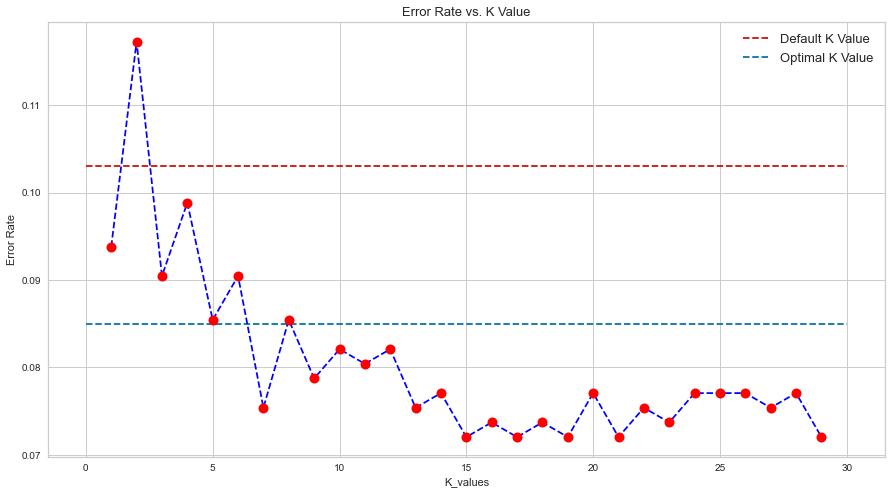

In [88]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value', size=13)
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.103, xmin = 0, xmax = 30, colors= 'r', linestyles='--', label='Default K Value')
plt.hlines(y=0.085, xmin = 0, xmax = 30, colors= 'b', linestyles='--', label='Optimal K Value')
plt.legend(prop={'size':13});

In [89]:
# MODELING WITH OPTIMAL K VALUE

knn_model = Pipeline(steps=[
      ('preprocessor', preprocessor1),
      ('scaler', RobustScaler()),
      ('clf', KNeighborsClassifier(n_neighbors=7))
])

knn_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['Salary']),
                                                 ('encoder_nominal',
                                                  OneHotEncoder(),
                                                  ['Departments'])])),
                ('scaler', RobustScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=7))])

In [90]:
eval_metric(knn_model, X_train, y_train, X_test, y_test)

Test_Set
[[2898  103]
 [  45  552]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3001
           1       0.84      0.92      0.88       597

    accuracy                           0.96      3598
   macro avg       0.91      0.95      0.93      3598
weighted avg       0.96      0.96      0.96      3598


Train_Set
[[6811  188]
 [ 135 1259]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      6999
           1       0.87      0.90      0.89      1394

    accuracy                           0.96      8393
   macro avg       0.93      0.94      0.93      8393
weighted avg       0.96      0.96      0.96      8393



**Model Building With OrdinalEncoder***

In [91]:
# categorical features
# cat_features = ['departments', 'salary']

# you can use column transformer to do pre-processing all of dataframe's columns at the same time without doing it in pandas
preprocessor2 = ColumnTransformer(transformers=[
    ('encoder_nominal', OrdinalEncoder(), ['Departments']),
    ('encoder_ordinal', OrdinalEncoder(categories=[['low', 'medium', 'high']]), ['Salary'])
], remainder='passthrough')

# pipeline chains steps together sequentially
knn_model = Pipeline(steps=[
      ('preprocessor', preprocessor2),
      ('scaler', RobustScaler()),
      ('clf', KNeighborsClassifier()) # clf for classifier
])

knn_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder_nominal',
                                                  OrdinalEncoder(),
                                                  ['Departments']),
                                                 ('encoder_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['Salary'])])),
                ('scaler', RobustScaler()), ('clf', KNeighborsClassifier())])

In [92]:
eval_metric(knn_model, X_train, y_train, X_test, y_test)

Test_Set
[[2937   64]
 [  47  550]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3001
           1       0.90      0.92      0.91       597

    accuracy                           0.97      3598
   macro avg       0.94      0.95      0.94      3598
weighted avg       0.97      0.97      0.97      3598


Train_Set
[[6874  125]
 [ 126 1268]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6999
           1       0.91      0.91      0.91      1394

    accuracy                           0.97      8393
   macro avg       0.95      0.95      0.95      8393
weighted avg       0.97      0.97      0.97      8393



In [94]:
# CROSS VALIDATION

model = Pipeline(steps=[
      ('preprocessor', preprocessor2),
      ('scaler', RobustScaler()),
      ('clf', KNeighborsClassifier())
])

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=10)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.963
test_precision   0.876
test_recall      0.905
test_f1          0.890
test_roc_auc     0.957
dtype: float64

In [97]:
# Elbow Method for Choosing Best K Values

model = Pipeline(steps=[
      ('preprocessor', preprocessor2),
      ('scaler', RobustScaler()),
      ('clf', KNeighborsClassifier())
])
    
test_error_rates = []

for k in range(1,30):
    
    model.set_params(clf__n_neighbors=k)
    model.fit(X_train,y_train) 
   
    y_pred_test = model.predict(X_test)
    
    test_error = 1 - recall_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

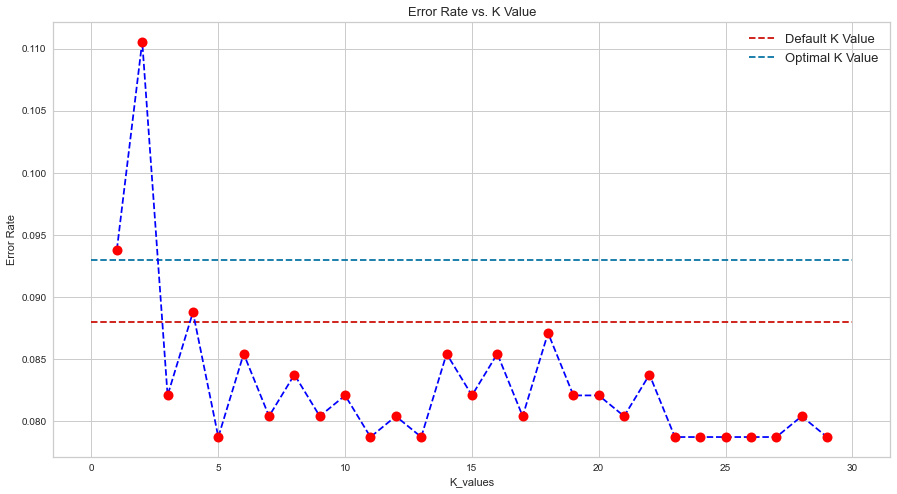

In [98]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value', size=13)
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.088, xmin = 0, xmax = 30, colors= 'r', linestyles='--', label='Default K Value')
plt.hlines(y=0.093, xmin = 0, xmax = 30, colors= 'b', linestyles='--', label='Optimal K Value')
plt.legend(prop={'size':13});

In [99]:
# MODELING WITH OPTIMAL K VALUE

knn_model = Pipeline(steps=[
      ('preprocessor', preprocessor2),
      ('scaler', RobustScaler()),
      ('clf', KNeighborsClassifier(n_neighbors=5))
])

knn_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder_nominal',
                                                  OrdinalEncoder(),
                                                  ['Departments']),
                                                 ('encoder_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['Salary'])])),
                ('scaler', RobustScaler()), ('clf', KNeighborsClassifier())])

In [100]:
eval_metric(knn_model, X_train, y_train, X_test, y_test)

Test_Set
[[2937   64]
 [  47  550]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3001
           1       0.90      0.92      0.91       597

    accuracy                           0.97      3598
   macro avg       0.94      0.95      0.94      3598
weighted avg       0.97      0.97      0.97      3598


Train_Set
[[6874  125]
 [ 126 1268]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6999
           1       0.91      0.91      0.91      1394

    accuracy                           0.97      8393
   macro avg       0.95      0.95      0.95      8393
weighted avg       0.97      0.97      0.97      8393



In [101]:
# GRID SEARCH (with ordinal encoder)

model = Pipeline(steps=[
      ('preprocessor', preprocessor2),
      ('scaler', RobustScaler()),
      ('clf', KNeighborsClassifier())
])

param_grid = {'clf__n_neighbors': range(1,25), 'clf__p': [1,2], 'clf__weights': ['uniform', 'distance'],
              'clf__leaf_size': [15, 30, 40]}

knn_grid_model = GridSearchCV(model, param_grid, cv=10, verbose=1, scoring='f1', n_jobs=-1)

knn_grid_model.fit(X_train,y_train)

print('\n', knn_grid_model.best_params_)
print('\n', knn_grid_model.best_estimator_)
print('\n', 'Best Score :', knn_grid_model.best_score_)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits

 {'clf__leaf_size': 15, 'clf__n_neighbors': 4, 'clf__p': 2, 'clf__weights': 'uniform'}

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder_nominal',
                                                  OrdinalEncoder(),
                                                  ['Departments']),
                                                 ('encoder_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['Salary'])])),
                ('scaler', RobustScaler()),
                ('clf', KNeighborsClassifier(leaf_size=15, n_neighbors=4))])

 Best Score : 0.901353037511

In [102]:
eval_metric(knn_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[2955   46]
 [  53  544]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3001
           1       0.92      0.91      0.92       597

    accuracy                           0.97      3598
   macro avg       0.95      0.95      0.95      3598
weighted avg       0.97      0.97      0.97      3598


Train_Set
[[6925   74]
 [ 135 1259]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6999
           1       0.94      0.90      0.92      1394

    accuracy                           0.98      8393
   macro avg       0.96      0.95      0.95      8393
weighted avg       0.97      0.98      0.97      8393



In [103]:
knn_model = Pipeline(steps=[
      ('preprocessor', preprocessor2),
      ('scaler', RobustScaler()),
      ('clf', KNeighborsClassifier())
]).fit(X_train, y_train)

#### Evaluating Model Performance

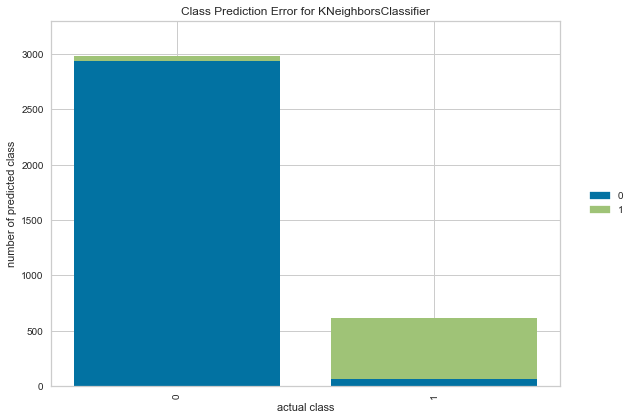

In [104]:
visualizer = ClassPredictionError(knn_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.poof();

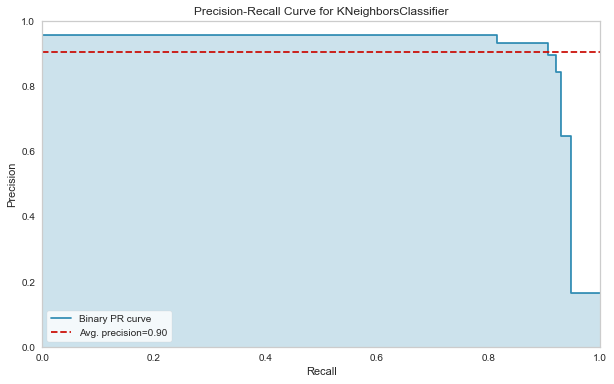

In [105]:
viz = PrecisionRecallCurve(knn_model)

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [106]:
y_pred_proba = knn_model.predict_proba(X_test)
average_precision_score(y_test, y_pred_proba[:,1])

0.9044161336238926

**Feature Importances**

Since KNN is a non-parametric algorithm, we cannot do feature importance in this model.

**Scores**

In [107]:
y_pred = knn_model.predict(X_test)
y_pred_proba = knn_model.predict_proba(X_test)

knn_accuracy = knn_model.score(X_test, y_test) # accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)
knn_precision_recall = average_precision_score(y_test, y_pred_proba[:,1])

#### Prediction

In [108]:
knn_model.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder_nominal',
                                                  OrdinalEncoder(),
                                                  ['Departments']),
                                                 ('encoder_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['Salary'])])),
                ('scaler', RobustScaler()), ('clf', KNeighborsClassifier())])

In [109]:
predict_btn = widgets.Button(
    description='Predict'
)

prediction_out = widgets.Output()

def make_prediction(btn):
    x = pd.DataFrame({
        'satisfaction_level': satisfaction_level_widget.value,
        'last_evaluation': last_evaluation_widget.value,
        'number_project': number_project_widget.value,
        'average_montly_hours': average_montly_hours_widget.value,
        'time_spend_company': time_spend_company_widget.value,
        'work_accident': work_accident_widget.value,
        'promotion_last_5years': promotion_last_5years_widget.value,
        'departments': departments_widget.value,
        'salary': salary_widget.value
    }, index=[0])
    
    prediction = knn_model.predict(x)
    
    with prediction_out:
        prediction_out.clear_output()
        if prediction[0] == 0:
            print('Prediction: ', prediction[0], '(stayed)')
        else:
            print('Prediction: ', prediction[0], '(left)')
        
predict_btn.on_click(make_prediction)

display(satisfaction_level_widget, last_evaluation_widget, number_project_widget, average_montly_hours_widget, 
        time_spend_company_widget, work_accident_widget, promotion_last_5years_widget, departments_widget, 
        salary_widget, predict_btn, prediction_out)

FloatSlider(value=0.76, description='Satisfaction_Level:', max=1.0, min=0.09, step=0.01)

FloatSlider(value=0.57, description='Last_Evaluation:', max=1.0, min=0.36, step=0.01)

IntSlider(value=5, description='Number_Project:', max=7, min=2)

IntSlider(value=174, description='Average_Montly_Hours:', max=310, min=96)

IntSlider(value=7, description='Time_Spend_Company:', max=10, min=2)

ToggleButtons(description='Work_Accident:', index=1, options=(0, 1), value=1)

ToggleButtons(description='Promotion_Last_5Years:', index=1, options=(0, 1), value=1)

Dropdown(description='Departments:', index=3, options=('support', 'sales', 'hr', 'marketing', 'technical', 'ma…

ToggleButtons(description='Salary:', index=1, options=('low', 'medium', 'high'), value='medium')

Button(description='Predict', style=ButtonStyle())

Output()

### #Random Forest Classifier

#### Model Building

In [111]:
clf = RandomForestClassifier(random_state=42)

# categorical features
# cat_features = ['departments', 'salary']

# you can use column transformer to do pre-processing all of dataframe's columns at the same time without doing it in pandas
preprocessor = make_column_transformer(
    (OrdinalEncoder(), ['Departments']),
    (OrdinalEncoder(categories=[['low', 'medium', 'high']]), ['Salary']), 
remainder='passthrough')

rf_model = make_pipeline(preprocessor, clf)

rf_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder-1',
                                                  OrdinalEncoder(),
                                                  ['Departments']),
                                                 ('ordinalencoder-2',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['Salary'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [112]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[2995    6]
 [  43  554]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3001
           1       0.99      0.93      0.96       597

    accuracy                           0.99      3598
   macro avg       0.99      0.96      0.97      3598
weighted avg       0.99      0.99      0.99      3598


Train_Set
[[6999    0]
 [   0 1394]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6999
           1       1.00      1.00      1.00      1394

    accuracy                           1.00      8393
   macro avg       1.00      1.00      1.00      8393
weighted avg       1.00      1.00      1.00      8393



In [113]:
# CROSS VALIDATION

model = make_pipeline(preprocessor, clf)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=10)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.984
test_precision   0.989
test_recall      0.913
test_f1          0.950
test_roc_auc     0.981
dtype: float64

In [114]:
# GRID SEARCH

model = make_pipeline(preprocessor, clf)  #clf=RandomForestClassifier(random_state=42)

param_grid = {'randomforestclassifier__n_estimators':[64, 100, 128, 200],
              'randomforestclassifier__max_features':[3, 5, 'auto'],
              'randomforestclassifier__max_depth':[4, 7, 9],
              'randomforestclassifier__min_samples_split':[2, 5, 8],
              'randomforestclassifier__class_weight': [None, 'balanced', 'balanced_subsample']}

rf_grid_model = GridSearchCV(model, param_grid, cv=10, verbose=1, scoring='f1', n_jobs=-1)

rf_grid_model.fit(X_train,y_train)

print('\n', rf_grid_model.best_params_)
print('\n', rf_grid_model.best_estimator_)
print('\n', 'Best Score :', rf_grid_model.best_score_)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits
Wall time: 3min 39s

 {'randomforestclassifier__class_weight': None, 'randomforestclassifier__max_depth': 9, 'randomforestclassifier__max_features': 5, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 128}

 Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder-1',
                                                  OrdinalEncoder(),
                                                  ['Departments']),
                                                 ('ordinalencoder-2',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['

In [118]:
print('\n', rf_grid_model.best_params_)
print('\n', rf_grid_model.best_estimator_)
print('\n', 'Best Score :', rf_grid_model.best_score_)


 {'randomforestclassifier__class_weight': None, 'randomforestclassifier__max_depth': 9, 'randomforestclassifier__max_features': 5, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 128}

 Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder-1',
                                                  OrdinalEncoder(),
                                                  ['Departments']),
                                                 ('ordinalencoder-2',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['Salary'])])),
                ('randomforestclassifier',
                 RandomFores

In [115]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[2993    8]
 [  44  553]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3001
           1       0.99      0.93      0.96       597

    accuracy                           0.99      3598
   macro avg       0.99      0.96      0.97      3598
weighted avg       0.99      0.99      0.99      3598


Train_Set
[[6986   13]
 [ 103 1291]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6999
           1       0.99      0.93      0.96      1394

    accuracy                           0.99      8393
   macro avg       0.99      0.96      0.97      8393
weighted avg       0.99      0.99      0.99      8393



In [119]:
rf_model = Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder-1',
                                                  OrdinalEncoder(),
                                                  ['Departments']),
                                                 ('ordinalencoder-2',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['Salary'])])),
                ('clf',
                 RandomForestClassifier(max_depth=9, max_features=5,
                                        min_samples_split=5, n_estimators=128,
                                        random_state=42))]).fit(X_train, y_train)

**Evaluating Model Performance**

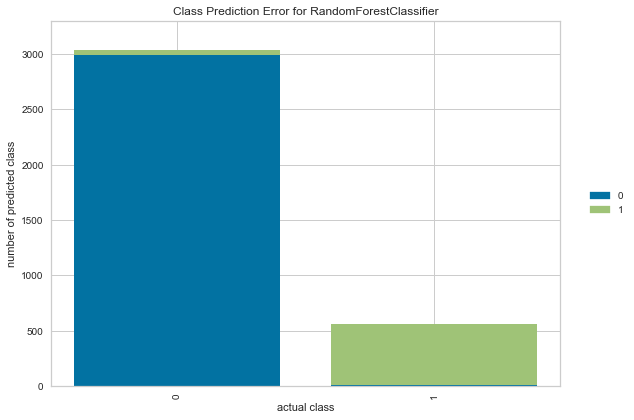

In [120]:
visualizer = ClassPredictionError(rf_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.poof();

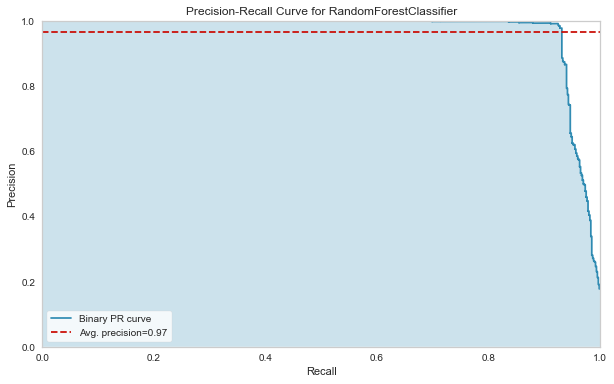

In [121]:
viz = PrecisionRecallCurve(rf_model)

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [122]:
y_pred_proba = rf_model.predict_proba(X_test)
average_precision_score(y_test, y_pred_proba[:,1])

0.9666662438329716

**Feature Importance**

In [123]:
rf_model.named_steps['clf']

RandomForestClassifier(max_depth=9, max_features=5, min_samples_split=5,
                       n_estimators=128, random_state=42)

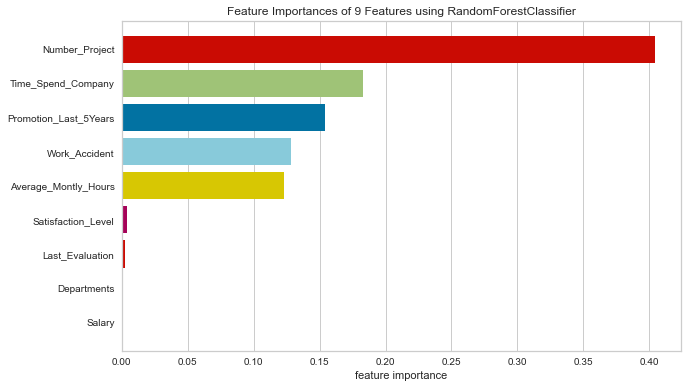

<AxesSubplot:title={'center':'Feature Importances of 9 Features using RandomForestClassifier'}, xlabel='feature importance'>

In [124]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(rf_model.named_steps['clf'], relative=False)
visualizer = RadViz(size=(700, 400))
viz.fit(X_train, y_train)
viz.show()

**Scores**

In [125]:
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)

rf_accuracy = rf_model.score(X_test, y_test) # accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_precision_recall = average_precision_score(y_test, y_pred_proba[:,1])

#### Prediction

In [126]:
rf_model.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder-1',
                                                  OrdinalEncoder(),
                                                  ['Departments']),
                                                 ('ordinalencoder-2',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['Salary'])])),
                ('clf',
                 RandomForestClassifier(max_depth=9, max_features=5,
                                        min_samples_split=5, n_estimators=128,
                                        random_state=42))])

In [127]:
predict_btn = widgets.Button(
    description='Predict'
)

prediction_out = widgets.Output()

def make_prediction(btn):
    x = pd.DataFrame({
        'satisfaction_level': satisfaction_level_widget.value,
        'last_evaluation': last_evaluation_widget.value,
        'number_project': number_project_widget.value,
        'average_montly_hours': average_montly_hours_widget.value,
        'time_spend_company': time_spend_company_widget.value,
        'work_accident': work_accident_widget.value,
        'promotion_last_5years': promotion_last_5years_widget.value,
        'departments': departments_widget.value,
        'salary': salary_widget.value
    }, index=[0])
    
    prediction = rf_model.predict(x)
    
    with prediction_out:
        prediction_out.clear_output()
        if prediction[0] == 0:
            print('Prediction: ', prediction[0], '(stayed)')
        else:
            print('Prediction: ', prediction[0], '(left)')
        
predict_btn.on_click(make_prediction)

display(satisfaction_level_widget, last_evaluation_widget, number_project_widget, average_montly_hours_widget, 
        time_spend_company_widget, work_accident_widget, promotion_last_5years_widget, departments_widget, 
        salary_widget, predict_btn, prediction_out)

FloatSlider(value=0.76, description='Satisfaction_Level:', max=1.0, min=0.09, step=0.01)

FloatSlider(value=0.57, description='Last_Evaluation:', max=1.0, min=0.36, step=0.01)

IntSlider(value=5, description='Number_Project:', max=7, min=2)

IntSlider(value=174, description='Average_Montly_Hours:', max=310, min=96)

IntSlider(value=7, description='Time_Spend_Company:', max=10, min=2)

ToggleButtons(description='Work_Accident:', index=1, options=(0, 1), value=1)

ToggleButtons(description='Promotion_Last_5Years:', index=1, options=(0, 1), value=1)

Dropdown(description='Departments:', index=3, options=('support', 'sales', 'hr', 'marketing', 'technical', 'ma…

ToggleButtons(description='Salary:', index=1, options=('low', 'medium', 'high'), value='medium')

Button(description='Predict', style=ButtonStyle())

Output()

**Model Comparing**

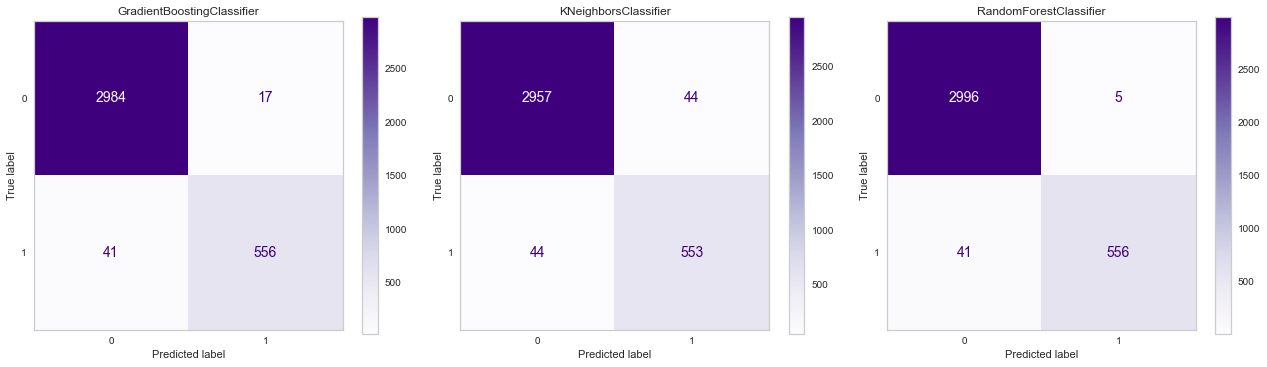

In [128]:
fig, axes = plt.subplots(1,3, figsize=(18,5))
plt.rcParams.update({'font.size': 14})

classifiers = [gbc_model, knn_model, rf_model]
for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, X_test, y_test, cmap=plt.cm.Purples, ax=ax)
    ax.grid(False)
    ax.title.set_text(type(cls.named_steps['clf']).__name__)

plt.tight_layout()
plt.show()

In [129]:
compare = pd.DataFrame({
            'Model': ['Gradient Boosting', 'KNN',  'Random Forest'],
            'accuracy': [gbc_accuracy, knn_accuracy, rf_accuracy],
            'precision': [gbc_precision, knn_precision, rf_precision],
            'recall': [gbc_recall, knn_recall, rf_recall],
            'f1': [gbc_f1, knn_f1, rf_f1],
            'precision_recall': [gbc_precision_recall, knn_precision_recall, rf_precision_recall]
})

In [130]:
compare

,Model,accuracy,precision,recall,f1,precision_recall
0,Gradient Boosting,0.984,0.970,0.931,0.950,0.969
1,KNN,0.969,0.896,0.921,0.908,0.904
2,Random Forest,0.986,0.986,0.926,0.955,0.967


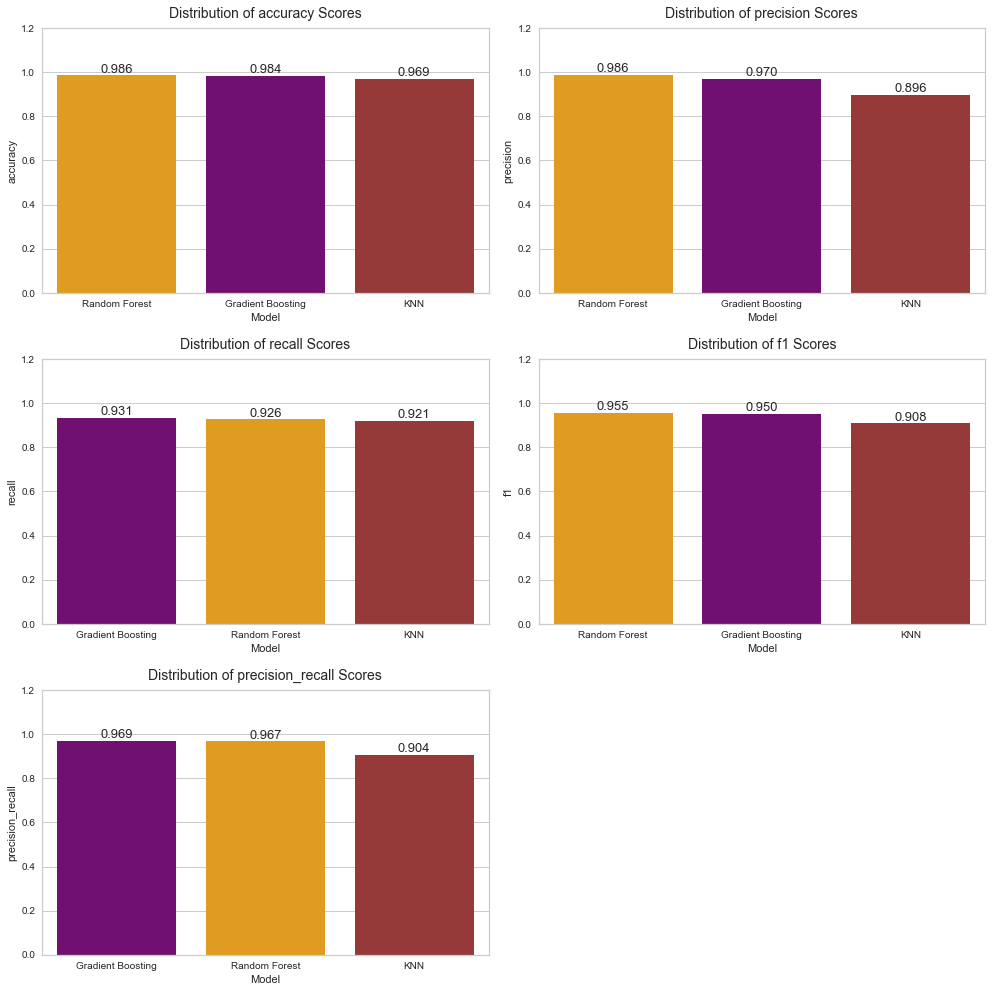

In [131]:
plt.figure(figsize=(14,14))

index = 0
colors={'Gradient Boosting': 'purple', 'Random Forest': 'orange', 'KNN': 'brown'}

for col in compare.iloc[:, 1:].columns:    
    index += 1
    plt.subplot(3,2,index)
    a = sns.barplot(data=compare.sort_values(col, ascending=False), x='Model', y=col, palette=colors)
    a.bar_label(a.containers[0], fmt='%.3f', fontsize=13), plt.ylim(0, 1.2)
    plt.title(f'Distribution of {col} Scores', fontsize=14, pad=10)
plt.tight_layout()

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model as .pkl

In [132]:
import joblib
joblib.dump(gbc_model, open('gbc_model.pkl', 'wb'))
joblib.dump(knn_model, open('knn_model.pkl', 'wb'))
joblib.dump(rf_model, open('rf_model.pkl', 'wb'))

In [133]:
# sample prediction
gbc_model = joblib.load(open('gbc_model.pkl', 'rb'))

In [136]:
sample = pd.DataFrame({
        'Satisfaction_Level': 0.38,
        'Last_Evaluation': 0.53,
        'Number_Project': 2,
        'Average_Montly_Hours': 157,
        'Time_Spend_Company': 3,
        'Work_Accident': 0,
        'Promotion_Last_5Years': 0,
        'Departments': 'sales',
        'Salary': 'low'
}, index=[0])

sample

,Satisfaction_Level,Last_Evaluation,Number_Project,Average_Montly_Hours,Time_Spend_Company,Work_Accident,Promotion_Last_5Years,Departments,Salary
0,0.380,0.530,2,157,3,0,0,sales,low


In [137]:
gbc_model.predict(sample)

array([1], dtype=int64)

### Save and Export Variables as .pkl

In [138]:
# column transformer and pipeline was used for data pre-processing (encoding and scaling)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___